<a href="https://colab.research.google.com/github/hufsaim/T03108701/blob/main/notebook_2025/Lab05_least_squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Least Squares Approximation
- 측정데이터 (t,b)에 대한 1차 함수 b = C + Dt 를 least squares approximation을 통하여 구해보는 실습입니다.
- 우리는 projection을 통해 least squares error를 최소로 만들어 주는 (C, D)를 구할 수가 있습니다.
- 주어진 데이터쌍 (t,b)로부터 linear equation Ax = b 를 구성하고, least squares error를 최소로 만드는 vector p 를 만들어주는 x를 구합니다.







In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- 실습에 사용하기 위한 csv파일을 불러와서 data를 관찰합니다.

In [2]:
df = pd.read_csv('alzheimer.csv')
df[::100]

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Converted,F,87,18,1,24,0.5,1275,0.683,1.376
100,Demented,M,79,14,3,26,0.5,1308,0.706,1.341
200,Nondemented,F,78,18,1,30,0.0,1243,0.748,1.412
300,Nondemented,F,74,12,3,29,0.0,1344,0.739,1.306


In [3]:
data = df[df["Group"] == "Nondemented"]
data

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
164,Nondemented,M,80,17,1,28,0.0,1660,0.728,1.057
165,Nondemented,M,89,16,1,28,0.0,1631,0.674,1.076
166,Nondemented,M,91,16,1,28,0.0,1640,0.670,1.070
167,Nondemented,F,76,16,1,28,0.0,1346,0.762,1.304
168,Nondemented,F,77,18,1,28,0.0,1559,0.713,1.125
...,...,...,...,...,...,...,...,...,...,...
349,Nondemented,M,60,12,4,30,0.0,1379,0.806,1.273
350,Nondemented,M,62,12,4,30,0.0,1378,0.795,1.274
351,Nondemented,M,64,12,4,30,0.0,1370,0.794,1.281
352,Nondemented,F,80,8,5,27,0.0,1381,0.751,1.270


- t, b에 data의 column을 입력하고, plot을 하여 t와 b의 관계를 관찰합니다.

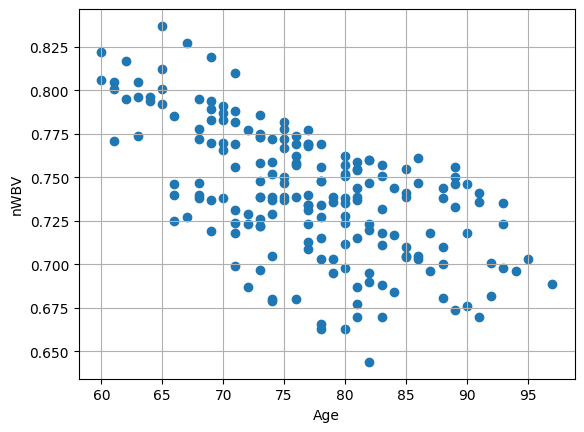

In [4]:
t_ind=2
b_ind=8
t = data.iloc[:,t_ind]
b = data.iloc[:,b_ind]
plt.scatter(t,b)
plt.xlabel(data.columns[t_ind])
plt.ylabel(data.columns[b_ind])
plt.grid(True)
plt.show()

- b vector의 shape을 확인합니다.

In [5]:
b=np.array(b)
b=b.reshape((len(b),1))
print(b.shape)

(190, 1)


- matrix A를 정의합니다. A의 첫 번째 column은 모두 1이 되게 하고, 두 번째 column은 t를 넣도록 합니다.
- A의 shape을 확인해 봅니다.

In [6]:
A = np.ones([len(b),2])
A[:,1] = t
print(A.shape)

(190, 2)


- Matrix A가 제대로 구성되었는지 확인해봅니다.

In [7]:
print('A=')
print(A)

A=
[[ 1. 80.]
 [ 1. 89.]
 [ 1. 91.]
 [ 1. 76.]
 [ 1. 77.]
 [ 1. 79.]
 [ 1. 77.]
 [ 1. 92.]
 [ 1. 94.]
 [ 1. 82.]
 [ 1. 84.]
 [ 1. 72.]
 [ 1. 74.]
 [ 1. 79.]
 [ 1. 82.]
 [ 1. 75.]
 [ 1. 77.]
 [ 1. 80.]
 [ 1. 60.]
 [ 1. 62.]
 [ 1. 80.]
 [ 1. 82.]
 [ 1. 84.]
 [ 1. 75.]
 [ 1. 97.]
 [ 1. 68.]
 [ 1. 70.]
 [ 1. 72.]
 [ 1. 85.]
 [ 1. 86.]
 [ 1. 92.]
 [ 1. 61.]
 [ 1. 63.]
 [ 1. 71.]
 [ 1. 78.]
 [ 1. 80.]
 [ 1. 78.]
 [ 1. 81.]
 [ 1. 79.]
 [ 1. 71.]
 [ 1. 73.]
 [ 1. 87.]
 [ 1. 78.]
 [ 1. 78.]
 [ 1. 71.]
 [ 1. 69.]
 [ 1. 63.]
 [ 1. 65.]
 [ 1. 81.]
 [ 1. 75.]
 [ 1. 80.]
 [ 1. 90.]
 [ 1. 95.]
 [ 1. 78.]
 [ 1. 80.]
 [ 1. 83.]
 [ 1. 77.]
 [ 1. 74.]
 [ 1. 83.]
 [ 1. 79.]
 [ 1. 83.]
 [ 1. 81.]
 [ 1. 69.]
 [ 1. 73.]
 [ 1. 73.]
 [ 1. 75.]
 [ 1. 78.]
 [ 1. 83.]
 [ 1. 73.]
 [ 1. 68.]
 [ 1. 93.]
 [ 1. 77.]
 [ 1. 78.]
 [ 1. 81.]
 [ 1. 66.]
 [ 1. 68.]
 [ 1. 69.]
 [ 1. 89.]
 [ 1. 88.]
 [ 1. 93.]
 [ 1. 78.]
 [ 1. 73.]
 [ 1. 81.]
 [ 1. 85.]
 [ 1. 81.]
 [ 1. 82.]
 [ 1. 66.]
 [ 1. 71.]
 [ 1. 76.]
 [ 1. 74.]
 [ 1. 7

- Vector b가 제대로 구성되었는지 확인해 봅니다.

In [8]:
print('b=')
print(b)

b=
[[0.728]
 [0.674]
 [0.67 ]
 [0.762]
 [0.713]
 [0.703]
 [0.731]
 [0.701]
 [0.696]
 [0.723]
 [0.717]
 [0.687]
 [0.679]
 [0.739]
 [0.644]
 [0.75 ]
 [0.734]
 [0.724]
 [0.822]
 [0.817]
 [0.698]
 [0.695]
 [0.684]
 [0.737]
 [0.689]
 [0.747]
 [0.738]
 [0.729]
 [0.704]
 [0.705]
 [0.682]
 [0.771]
 [0.774]
 [0.699]
 [0.666]
 [0.663]
 [0.748]
 [0.739]
 [0.736]
 [0.731]
 [0.739]
 [0.696]
 [0.727]
 [0.663]
 [0.756]
 [0.737]
 [0.805]
 [0.792]
 [0.754]
 [0.767]
 [0.762]
 [0.746]
 [0.703]
 [0.748]
 [0.738]
 [0.718]
 [0.723]
 [0.737]
 [0.757]
 [0.695]
 [0.688]
 [0.687]
 [0.719]
 [0.722]
 [0.773]
 [0.772]
 [0.734]
 [0.751]
 [0.786]
 [0.795]
 [0.723]
 [0.769]
 [0.769]
 [0.737]
 [0.785]
 [0.772]
 [0.77 ]
 [0.756]
 [0.681]
 [0.698]
 [0.703]
 [0.739]
 [0.755]
 [0.739]
 [0.677]
 [0.69 ]
 [0.725]
 [0.718]
 [0.758]
 [0.729]
 [0.709]
 [0.769]
 [0.752]
 [0.757]
 [0.758]
 [0.759]
 [0.739]
 [0.741]
 [0.68 ]
 [0.812]
 [0.746]
 [0.741]
 [0.747]
 [0.732]
 [0.735]
 [0.746]
 [0.74 ]
 [0.74 ]
 [0.723]
 [0.801]
 [0.796

- matrix A의 transpose matrix를 계산합니다.

In [9]:
AT = A.transpose()
AT.shape

(2, 190)

- matrix A의 transpose와 matrix A를 곱한 결과를 ATA로 정의합니다.

In [10]:
ATA = np.matmul(AT,A)
print('shape of ATA:',ATA.shape)
print('ATA=')
print(ATA)

shape of ATA: (2, 2)
ATA=
[[1.900000e+02 1.464100e+04]
 [1.464100e+04 1.140593e+06]]


- ATA의 inverse matrix를 구합니다.

In [11]:
ATA_inv = np.linalg.inv(ATA)
print('ATA_inv=')
print(ATA)

ATA_inv=
[[1.900000e+02 1.464100e+04]
 [1.464100e+04 1.140593e+06]]


- least squares error를 최소로 만들어주는 x를 구합니다.

In [12]:
x = np.matmul(ATA_inv, np.matmul(AT,b)) # least squares solution
print('shape of x:',x.shape)
print('x=')
print(x)

shape of x: (2, 1)
x=
[[ 0.95653449]
 [-0.00279834]]


- b = C + Dt 의 C를 x로부터 얻어낼 수 있습니다.

In [13]:
C = x[0]
D = x[1]
print('C=',C)
print('D=',D)

C= [0.95653449]
D= [-0.00279834]


- Projection vector p는 x에 A를 곱하여 얻을 수 있습니다.
- Error vector는 b에서 p를 빼주어 구합니다.

In [14]:
p = np.matmul(A,x)
e = b - p
print(e)

[[-0.00466698]
 [-0.03348188]
 [-0.0318852 ]
 [ 0.01813965]
 [-0.02806201]
 [-0.03246532]
 [-0.01006201]
 [ 0.00191315]
 [ 0.00250984]
 [-0.00407029]
 [-0.0044736 ]
 [-0.06805373]
 [-0.07045704]
 [ 0.00353468]
 [-0.08307029]
 [ 0.0033413 ]
 [-0.00706201]
 [-0.00866698]
 [ 0.03336614]
 [ 0.03396283]
 [-0.03466698]
 [-0.03207029]
 [-0.0374736 ]
 [-0.0096587 ]
 [ 0.00390487]
 [-0.0192471 ]
 [-0.02265042]
 [-0.02605373]
 [-0.01467526]
 [-0.01087691]
 [-0.01708685]
 [-0.01483551]
 [-0.00623882]
 [-0.05885207]
 [-0.07226367]
 [-0.06966698]
 [ 0.00973633]
 [ 0.00913137]
 [ 0.00053468]
 [-0.02685207]
 [-0.01325538]
 [-0.01707857]
 [-0.01126367]
 [-0.07526367]
 [-0.00185207]
 [-0.02644876]
 [ 0.02476118]
 [ 0.01735786]
 [ 0.02413137]
 [ 0.0203413 ]
 [ 0.02933302]
 [ 0.04131646]
 [ 0.01230818]
 [ 0.00973633]
 [ 0.00533302]
 [-0.00627195]
 [-0.01806201]
 [-0.01245704]
 [ 0.03272805]
 [-0.04046532]
 [-0.03627195]
 [-0.04286863]
 [-0.04444876]
 [-0.03025538]
 [ 0.02074462]
 [ 0.0253413 ]
 [-0.00426

- Projection vector를 plot하여 data를 잘 표현하는 1차함수가 만들어졌는지 확인해봅니다.

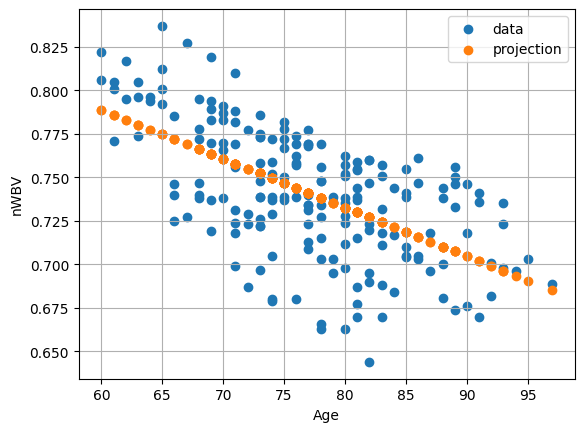

In [15]:
plt.scatter(t,b)
plt.scatter(t,p)
plt.xlabel(data.columns[t_ind])
plt.ylabel(data.columns[b_ind])
plt.grid(True)
plt.legend(['data','projection'])
plt.show()

- Error vector를 plot하여 각각의 data에 대한 error의 정도를 확인해 볼 수 있습니다.

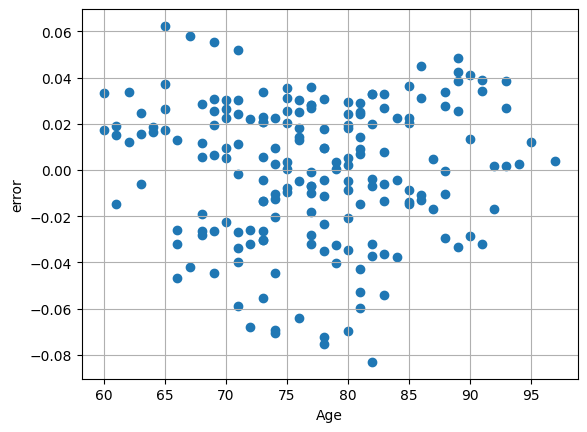

In [16]:
plt.scatter(t,e)
plt.xlabel(data.columns[t_ind])
plt.ylabel('error')
plt.grid(True)
plt.show()

- 지금까지의 과정을 numpy에서 제공하는 lstsq함수를 이용해 한 번에 구해볼 수도 있습니다.

In [17]:
x =np.linalg.lstsq(A,b) # least squares solution
C = x[0][0]
D = x[0][1]
print('C=',C)
print('D=',D)

C= [0.95653449]
D= [-0.00279834]
